# Data Visualization

In [1]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import os
from skimage import io
import torch
from skimage import color
from torchvision import transforms
import torchvision.models as models
import ast
import time
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import cohen_kappa_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
import pickle
from copy import deepcopy
from collections import defaultdict
import seaborn as sns

In [2]:
image_valid_df = pd.read_csv('./best_models_results/image_only_validation_metrics.csv')
image_test_df = pd.read_csv('./best_models_results/image_only_test_metrics.csv')
tab_valid_df = pd.read_csv('./best_models_results/tabular_validation_metrics.csv')
tab_test_df = pd.read_csv('./best_models_results/tabular_test_metrics.csv')

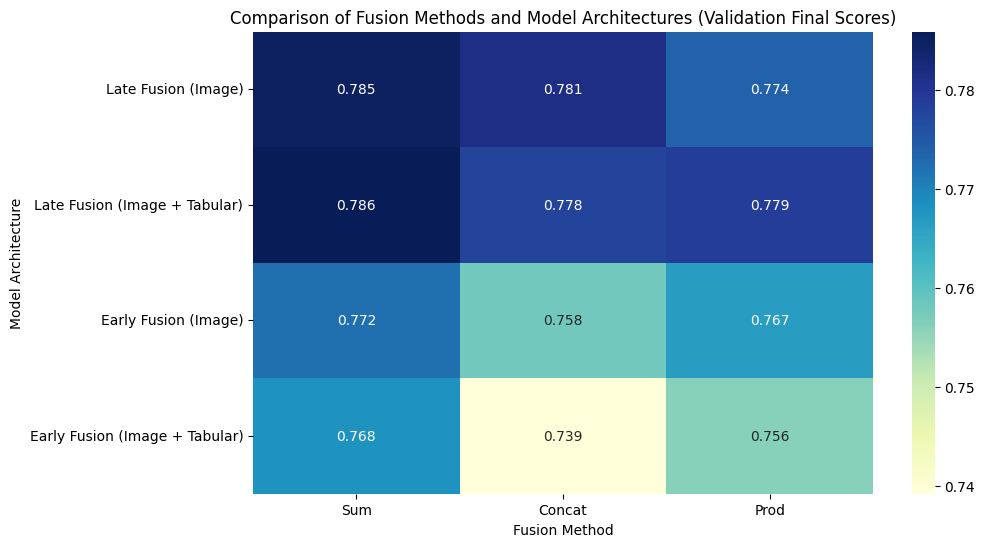

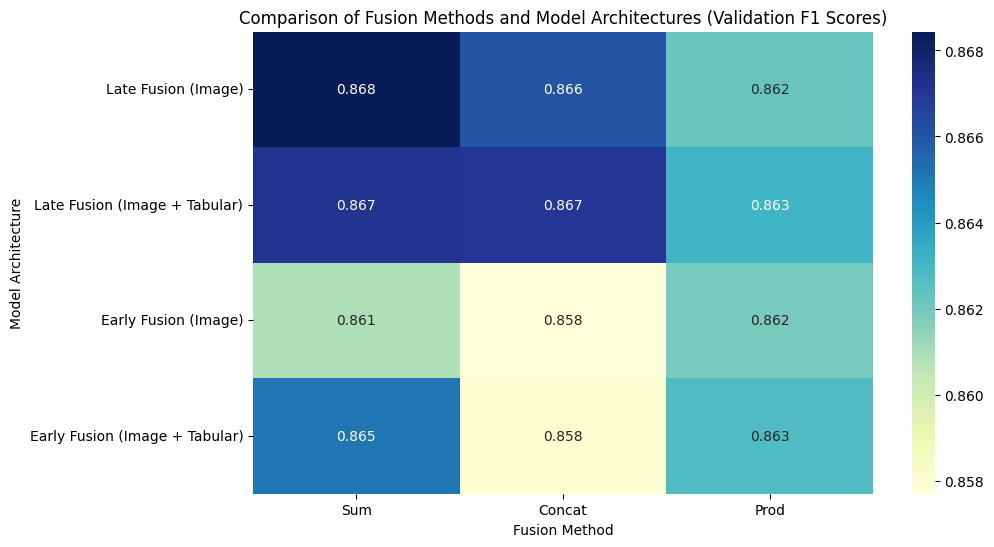

In [3]:
image_final_scores = image_valid_df['Final'].values
tab_final_scores = tab_valid_df['Final'].values

scores = np.array([
    image_final_scores[:3],  # Late Fusion (Image)
    tab_final_scores[:3],    # Late Fusion (Image + Tabular)
    image_final_scores[3:],  # Early Fusion (Image)
    tab_final_scores[3:]     # Early Fusion (Image + Tabular)
])

# Set the fusion methods and model architectures as row and column labels
fusion_methods = ['Sum', 'Concat', 'Prod']
model_architectures = ['Late Fusion (Image)', 'Late Fusion (Image + Tabular)', 'Early Fusion (Image)', 'Early Fusion (Image + Tabular)']

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(scores, annot=True, cmap='YlGnBu', fmt='.3f', xticklabels=fusion_methods, yticklabels=model_architectures)
plt.xlabel('Fusion Method')
plt.ylabel('Model Architecture')
plt.title('Comparison of Fusion Methods and Model Architectures (Validation Final Scores)')
plt.show()

image_f1_scores = image_valid_df['F1'].values
tab_f1_scores = tab_valid_df['F1'].values

scores = np.array([
    image_f1_scores[:3],  # Late Fusion (Image)
    tab_f1_scores[:3],    # Late Fusion (Image + Tabular)
    image_f1_scores[3:],  # Early Fusion (Image)
    tab_f1_scores[3:]     # Early Fusion (Image + Tabular)
])

# Set the fusion methods and model architectures as row and column labels
fusion_methods = ['Sum', 'Concat', 'Prod']
model_architectures = ['Late Fusion (Image)', 'Late Fusion (Image + Tabular)', 'Early Fusion (Image)', 'Early Fusion (Image + Tabular)']

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(scores, annot=True, cmap='YlGnBu', fmt='.3f', xticklabels=fusion_methods, yticklabels=model_architectures)
plt.xlabel('Fusion Method')
plt.ylabel('Model Architecture')
plt.title('Comparison of Fusion Methods and Model Architectures (Validation F1 Scores)')
plt.show()

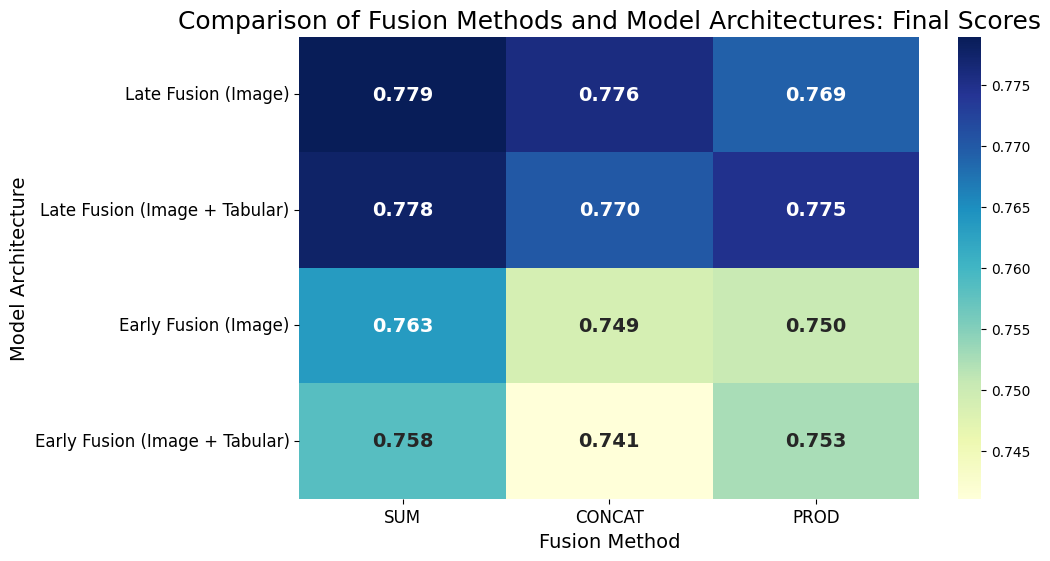

In [4]:
image_final_scores = image_test_df['Final'].values
tab_final_scores = tab_test_df['Final'].values

scores = np.array([
    image_final_scores[:3],  # Late Fusion (Image)
    tab_final_scores[:3],    # Late Fusion (Image + Tabular)
    image_final_scores[3:],  # Early Fusion (Image)
    tab_final_scores[3:]     # Early Fusion (Image + Tabular)
])

# Set the fusion methods and model architectures as row and column labels
fusion_methods = ['SUM', 'CONCAT', 'PROD']
model_architectures = ['Late Fusion (Image)', 'Late Fusion (Image + Tabular)', 'Early Fusion (Image)', 'Early Fusion (Image + Tabular)']

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(scores, annot=True, cmap='YlGnBu', fmt='.3f', xticklabels=fusion_methods, yticklabels=model_architectures, annot_kws={"size": 14, "weight": "bold"})
plt.xlabel('Fusion Method', fontsize=14)
plt.ylabel('Model Architecture', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Comparison of Fusion Methods and Model Architectures: Final Scores', fontsize=18)
plt.show()


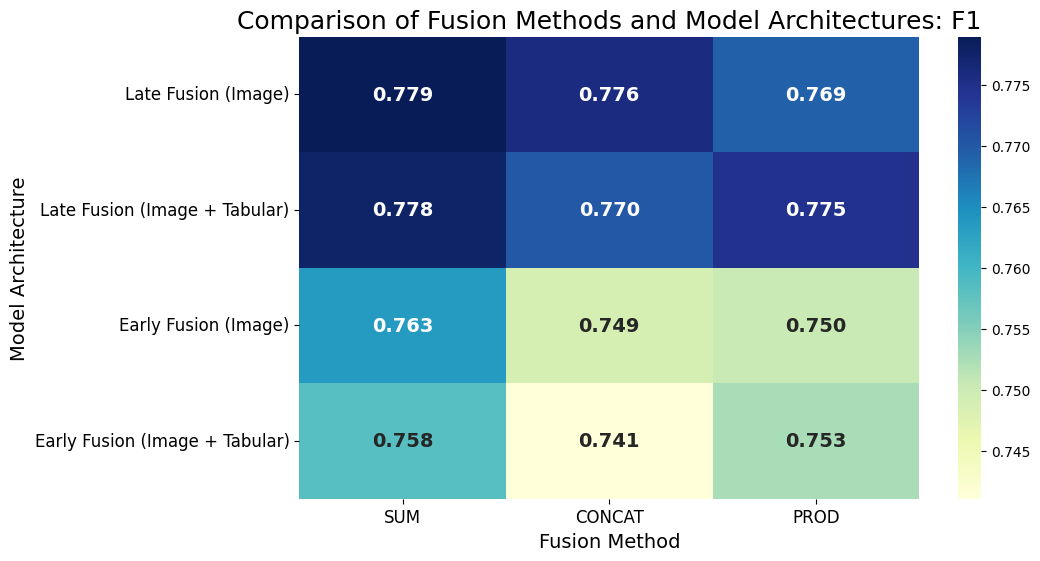

In [5]:
image_f1_scores = image_test_df['F1'].values
tab_f1_scores = tab_test_df['F1'].values

f1_scores = np.array([
    image_f1_scores[:3],  # Late Fusion (Image)
    tab_f1_scores[:3],    # Late Fusion (Image + Tabular)
    image_f1_scores[3:],  # Early Fusion (Image)
    tab_f1_scores[3:]     # Early Fusion (Image + Tabular)
])

# Set the fusion methods and model architectures as row and column labels
fusion_methods = ['SUM', 'CONCAT', 'PROD']
model_architectures = ['Late Fusion (Image)', 'Late Fusion (Image + Tabular)', 'Early Fusion (Image)', 'Early Fusion (Image + Tabular)']

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(scores, annot=True, cmap='YlGnBu', fmt='.3f', xticklabels=fusion_methods, yticklabels=model_architectures, annot_kws={"size": 14, "weight": "bold"})
plt.xlabel('Fusion Method', fontsize=14)
plt.ylabel('Model Architecture', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Comparison of Fusion Methods and Model Architectures: F1', fontsize=18)
plt.show()

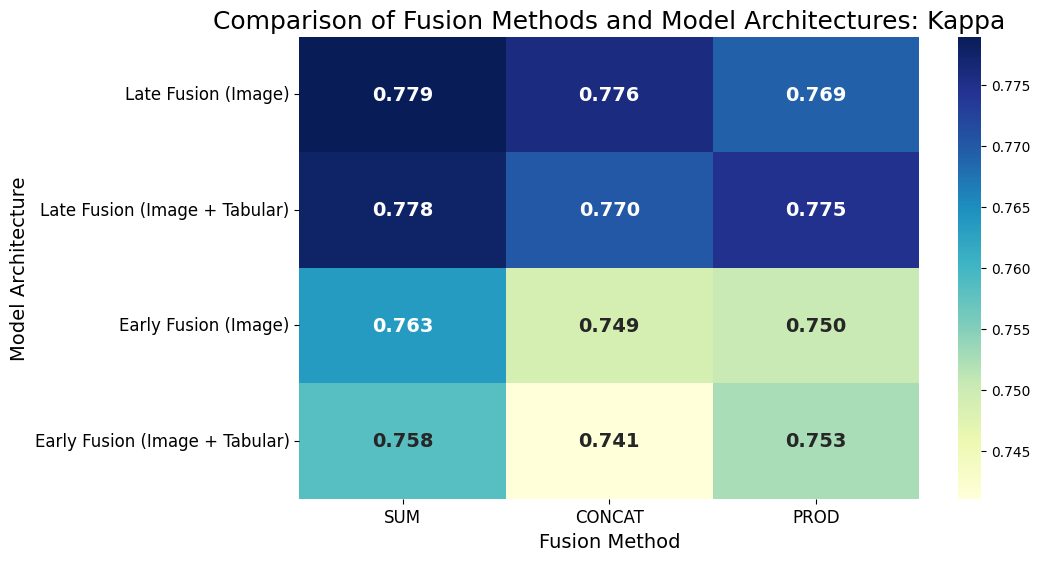

In [6]:
image_kappa_scores = image_test_df['Kappa'].values
tab_kappa_scores = tab_test_df['Kappa'].values

kappa_scores = np.array([
    image_kappa_scores[:3],  # Late Fusion (Image)
    tab_kappa_scores[:3],    # Late Fusion (Image + Tabular)
    image_kappa_scores[3:],  # Early Fusion (Image)
    tab_kappa_scores[3:]     # Early Fusion (Image + Tabular)
])

# Set the fusion methods and model architectures as row and column labels
fusion_methods = ['SUM', 'CONCAT', 'PROD']
model_architectures = ['Late Fusion (Image)', 'Late Fusion (Image + Tabular)', 'Early Fusion (Image)', 'Early Fusion (Image + Tabular)']

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(scores, annot=True, cmap='YlGnBu', fmt='.3f', xticklabels=fusion_methods, yticklabels=model_architectures, annot_kws={"size": 14, "weight": "bold"})
plt.xlabel('Fusion Method', fontsize=14)
plt.ylabel('Model Architecture', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Comparison of Fusion Methods and Model Architectures: Kappa', fontsize=18)
plt.show()

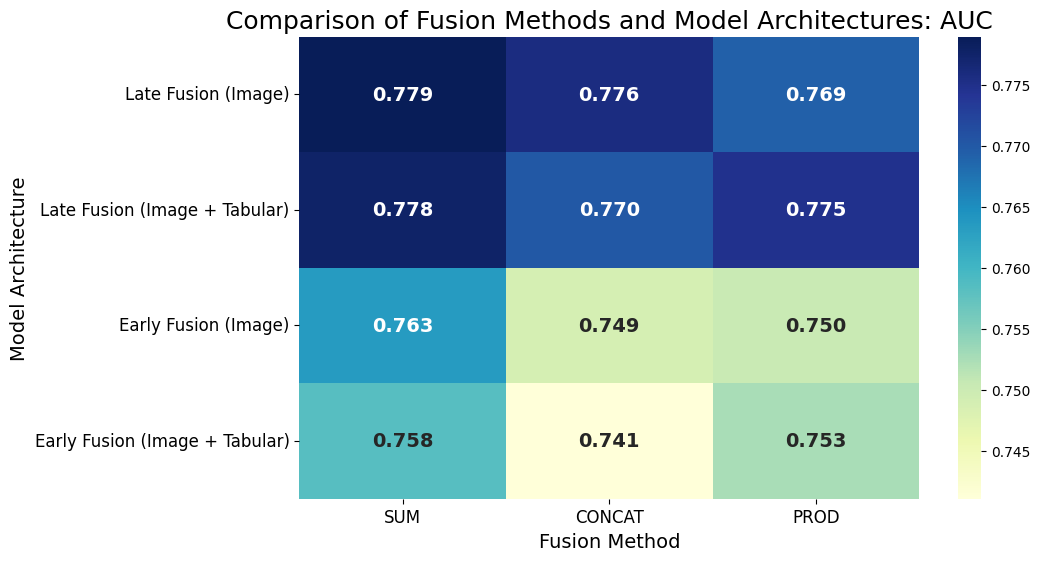

In [7]:
image_auc_scores = image_test_df['AUC'].values
tab_auc_scores = tab_test_df['AUC'].values

auc_scores = np.array([
    image_auc_scores[:3],  # Late Fusion (Image)
    tab_auc_scores[:3],    # Late Fusion (Image + Tabular)
    image_auc_scores[3:],  # Early Fusion (Image)
    tab_auc_scores[3:]     # Early Fusion (Image + Tabular)
])

# Set the fusion methods and model architectures as row and column labels
fusion_methods = ['SUM', 'CONCAT', 'PROD']
model_architectures = ['Late Fusion (Image)', 'Late Fusion (Image + Tabular)', 'Early Fusion (Image)', 'Early Fusion (Image + Tabular)']

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(scores, annot=True, cmap='YlGnBu', fmt='.3f', xticklabels=fusion_methods, yticklabels=model_architectures, annot_kws={"size": 14, "weight": "bold"})
plt.xlabel('Fusion Method', fontsize=14)
plt.ylabel('Model Architecture', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Comparison of Fusion Methods and Model Architectures: AUC', fontsize=18)
plt.show()

In [8]:
image_final_scores = image_test_df['Final'].values
tab_final_scores = tab_test_df['Final'].values

final_scores = np.array([
    image_final_scores[:3],  # Late Fusion (Image)
    tab_final_scores[:3],    # Late Fusion (Image + Tabular)
    image_final_scores[3:],  # Early Fusion (Image)
    tab_final_scores[3:]     # Early Fusion (Image + Tabular)
])

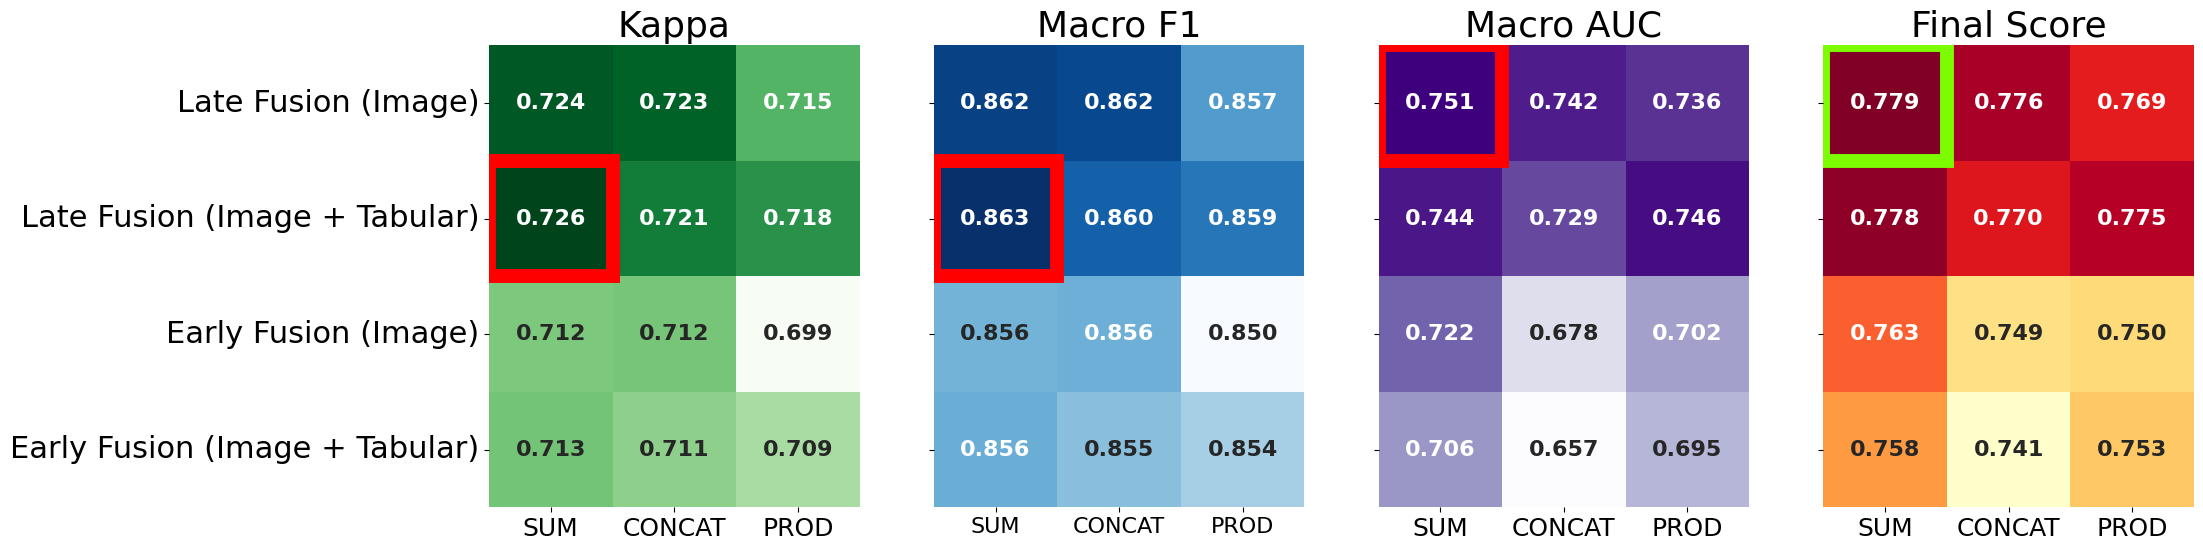

In [9]:
from matplotlib.patches import Rectangle

fusion_methods = ['SUM', 'CONCAT', 'PROD']
model_architectures = ['Late Fusion (Image)', 'Late Fusion (Image + Tabular)', 'Early Fusion (Image)', 'Early Fusion (Image + Tabular)']

max_indices_kappa = np.unravel_index(np.argmax(kappa_scores, axis=None), kappa_scores.shape)
max_indices_f1 = np.unravel_index(np.argmax(f1_scores, axis=None), f1_scores.shape)
max_indices_auc = np.unravel_index(np.argmax(auc_scores, axis=None), auc_scores.shape)
max_indices_final = np.unravel_index(np.argmax(final_scores, axis=None), final_scores.shape)

# Function to draw rectangle around max value
def draw_rectangle(ax, max_indices, color):
    rect = Rectangle((max_indices[1], max_indices[0]), 1, 1, fill=False, edgecolor=color, linewidth=10)
    ax.add_patch(rect)

fig, axs = plt.subplots(1, 4, figsize=(22, 6), gridspec_kw={'width_ratios': [0.25, 0.25, 0.25, 0.25]})

sns.heatmap(kappa_scores, annot=True, cmap='Greens', fmt='.3f', ax=axs[0], xticklabels=fusion_methods, yticklabels=model_architectures, annot_kws={"size": 16, "weight": "bold"}, cbar=False)
axs[0].set_ylabel('')
axs[0].tick_params(axis='y', labelsize=22)
axs[0].tick_params(axis='x', labelsize=18)
axs[0].set_title('Kappa', fontsize=26)

sns.heatmap(f1_scores, annot=True, cmap='Blues', fmt='.3f', ax=axs[1], xticklabels=fusion_methods, yticklabels=model_architectures, annot_kws={"size": 16, "weight": "bold"}, cbar=False)
axs[1].set_xlabel('')
axs[1].set_ylabel('')
axs[1].tick_params(axis='x', labelsize=16)
axs[1].set_yticklabels('', fontsize=14)
axs[1].set_title('Macro F1', fontsize=26)

sns.heatmap(auc_scores, annot=True, cmap='Purples', fmt='.3f', ax=axs[2], xticklabels=fusion_methods, yticklabels=model_architectures, annot_kws={"size": 16, "weight": "bold"}, cbar=False)
axs[2].set_xlabel('')
axs[2].set_ylabel('')
axs[2].tick_params(axis='x', labelsize=18)
axs[2].set_yticklabels('', fontsize=14)
axs[2].set_title('Macro AUC', fontsize=26)

sns.heatmap(final_scores, annot=True, cmap='YlOrRd', fmt='.3f', ax=axs[3], xticklabels=fusion_methods, yticklabels=model_architectures, annot_kws={"size": 16, "weight": "bold"}, cbar=False)
axs[3].set_xlabel('')
axs[3].set_ylabel('')
axs[3].tick_params(axis='x', labelsize=18)
axs[3].set_yticklabels('', fontsize=14)
axs[3].set_title('Final Score', fontsize=26)

draw_rectangle(axs[0], max_indices_kappa, 'red')
draw_rectangle(axs[1], max_indices_f1, 'red')
draw_rectangle(axs[2], max_indices_auc, 'red')
draw_rectangle(axs[3], max_indices_final, 'lawngreen')

# fig.suptitle('Comparison of Fusion Methods and Model Architectures', fontsize=28, y=1.05)
plt.savefig('fusion_comparison.png', bbox_inches='tight', dpi=600)
plt.show()

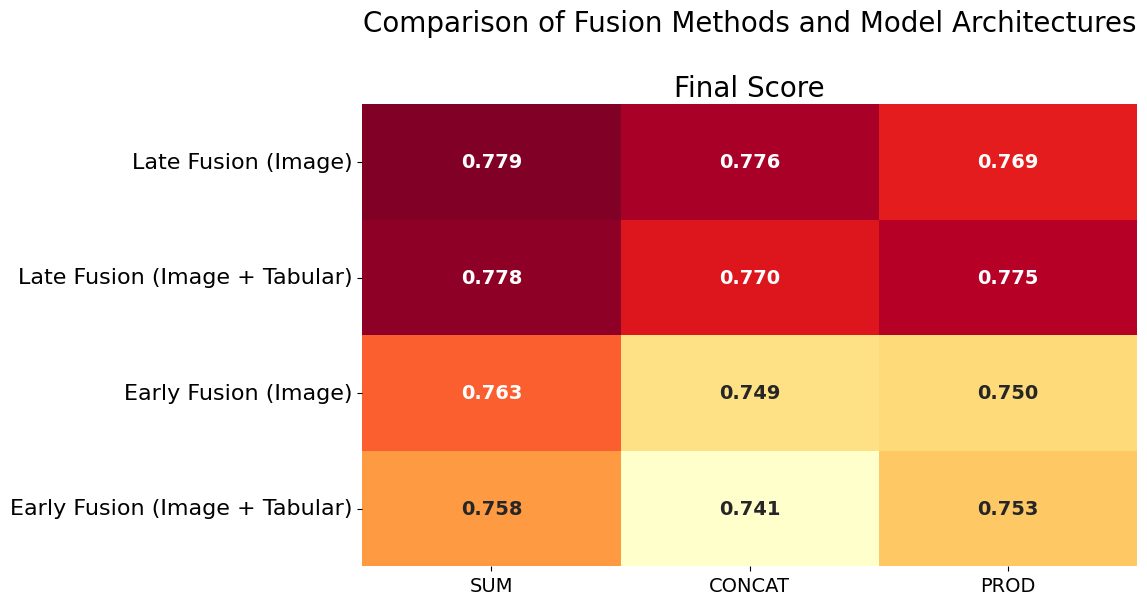

In [9]:
image_final_scores = image_test_df['Final'].values
tab_final_scores = tab_test_df['Final'].values

scores = np.array([
    image_final_scores[:3],  # Late Fusion (Image)
    tab_final_scores[:3],    # Late Fusion (Image + Tabular)
    image_final_scores[3:],  # Early Fusion (Image)
    tab_final_scores[3:]     # Early Fusion (Image + Tabular)
])

# Set the fusion methods and model architectures as row and column labels
fusion_methods = ['SUM', 'CONCAT', 'PROD']
model_architectures = ['Late Fusion (Image)', 'Late Fusion (Image + Tabular)', 'Early Fusion (Image)', 'Early Fusion (Image + Tabular)']

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(scores, annot=True, cmap='YlOrRd', fmt='.3f', xticklabels=fusion_methods, yticklabels=model_architectures, annot_kws={"size": 14, "weight": "bold"}, cbar=False)
# plt.xlabel('Fusion Method', fontsize=14)
# plt.ylabel('Model Architecture', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.title('Comparison of Fusion Methods and Model Architectures\n\nFinal Score', fontsize=20)
plt.savefig('fusion_final_comparison.png', bbox_inches='tight')
plt.show()
